In [1]:
# import important libraries
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# import the diamond dataset
df = pd.read_csv("diamonds.csv")

In [3]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
df.tail()

,carat,cut,color,clarity,depth,table,price,x,y,z
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64


In [5]:
df.shape

(53940, 10)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [7]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [8]:
# we can see the min values of the x y z are 0 so we can remove these are faulty values so we nned to filter it out
df = df.drop(df[df['x'] == 0].index)
df = df.drop(df[df['y'] == 0].index)
df = df.drop(df[df['z'] == 0].index)

In [9]:
df.describe()

,carat,depth,table,price,x,y,z
count,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000
mean,0.797698,61.749514,57.456834,3930.993231,5.731627,5.734887,3.540046
std,0.473795,1.432331,2.234064,3987.280446,1.119423,1.140126,0.702530
min,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5323.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [10]:
# make a split of numerical and categorical columns
numerical = ['carat', 'depth', 'table', 'price', 'x', 'y', 'z']
categorical = df.loc[:, ~df.columns.isin(numerical)].columns

## Analyse the categorical columns first

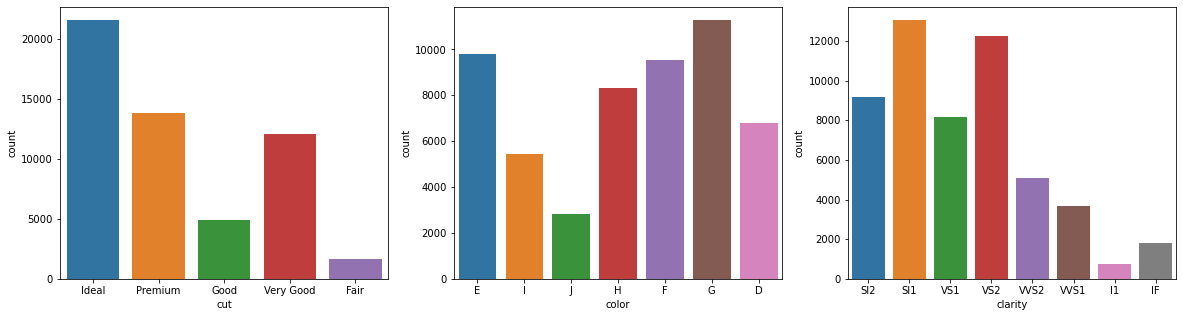

In [11]:
plt.figure(figsize = (20,5))
for i, col in enumerate(categorical):
    plt.subplot(1,3, i+1)
    sns.countplot(df[col])

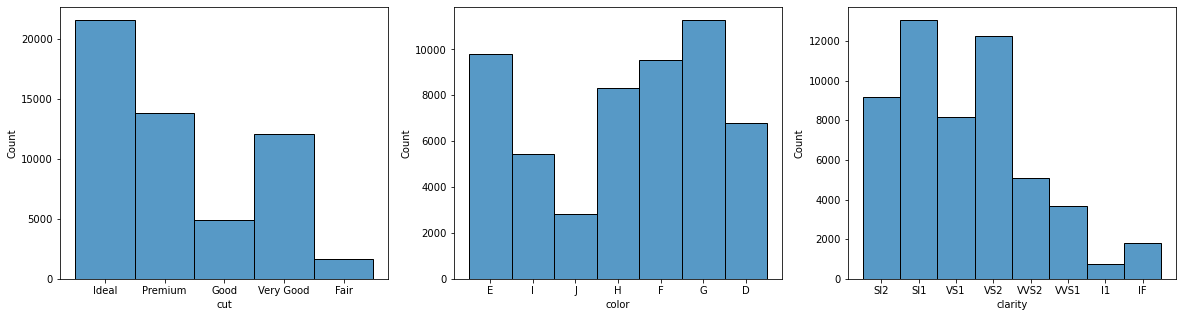

In [12]:
plt.figure(figsize = (20,5))
for i, col in enumerate(categorical):
    plt.subplot(1, 3, i+1)
    sns.histplot(df[col])

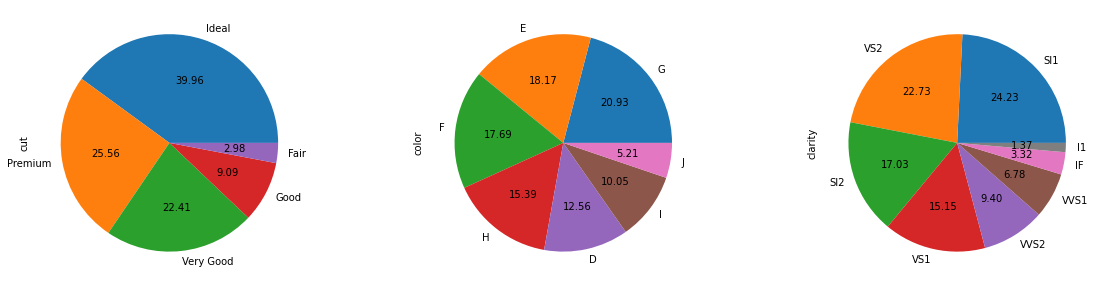

In [13]:
plt.figure(figsize = (20,5))
for i, col in enumerate(categorical):
    plt.subplot(1, 3, i+1)
    df[col].value_counts().plot(kind= 'pie', autopct = '%.2f')

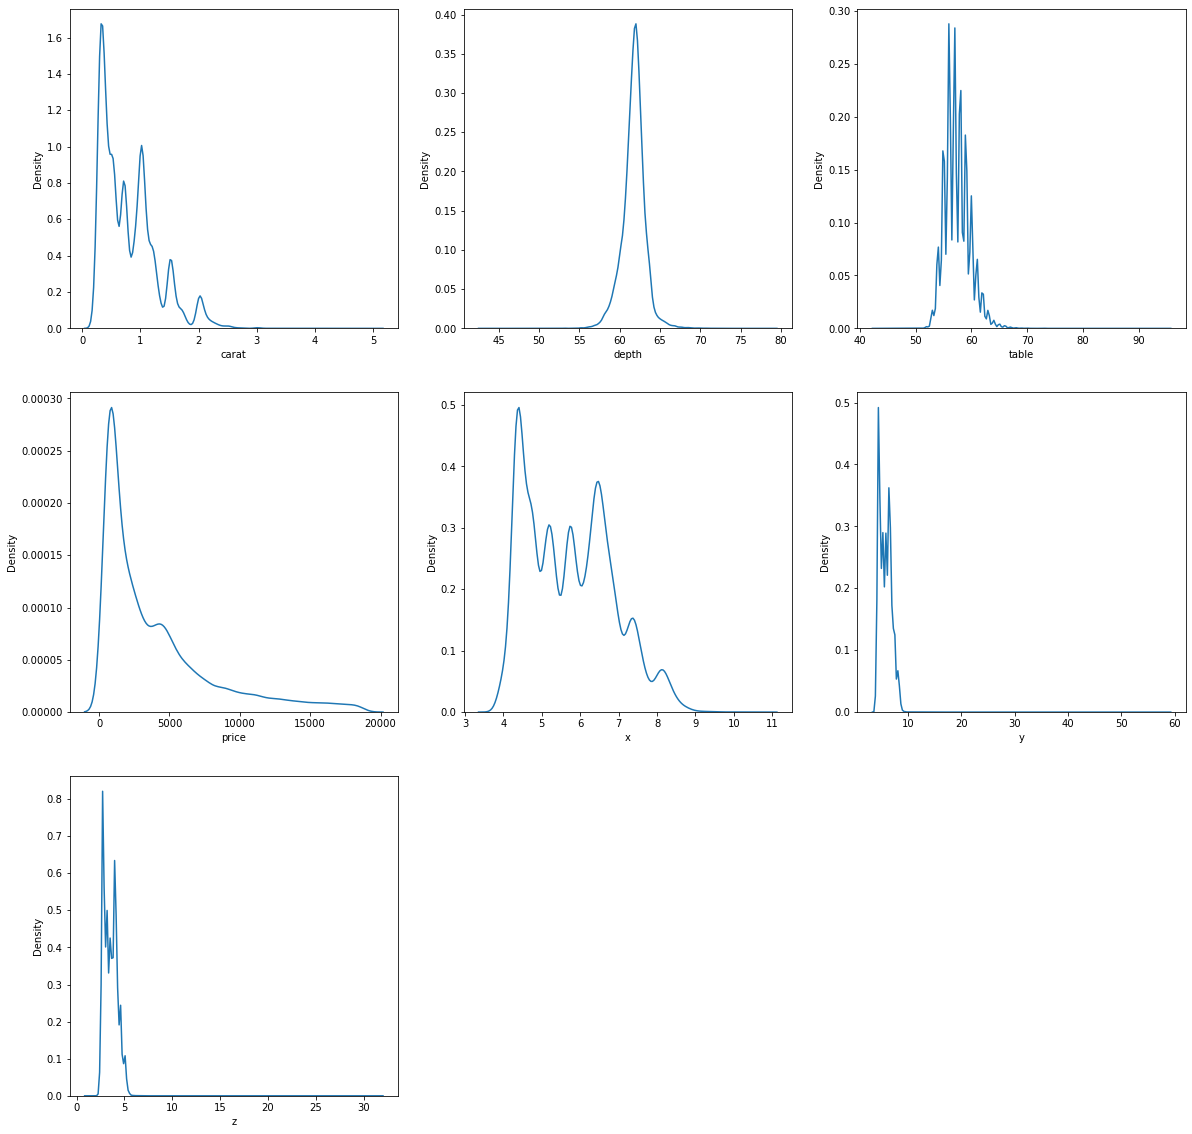

In [14]:
# plot the distplot for numerical columns
plt.figure(figsize = (20, 20))

for i, col in enumerate(numerical):
    plt.subplot(3, 3, i+1)
    sns.kdeplot(data = df, x = col)

<AxesSubplot:xlabel='price', ylabel='Density'>

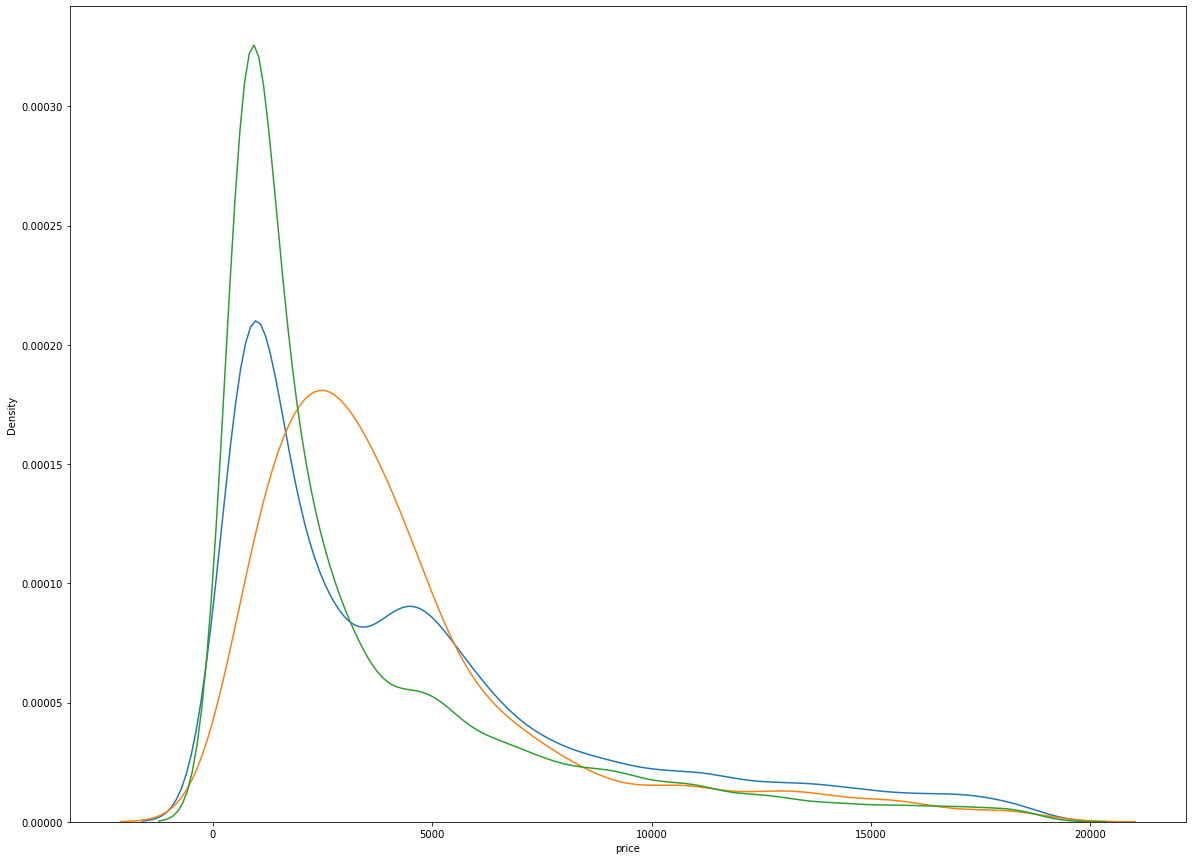

In [15]:
plt.figure(figsize = (20, 15))
sns.distplot(df[df['cut'] == 'Premium']['price'], hist = False)
sns.distplot(df[df['cut'] == 'Fair']['price'], hist = False)
sns.distplot(df[df['cut'] == 'Ideal']['price'], hist = False)

<AxesSubplot:xlabel='price', ylabel='Density'>

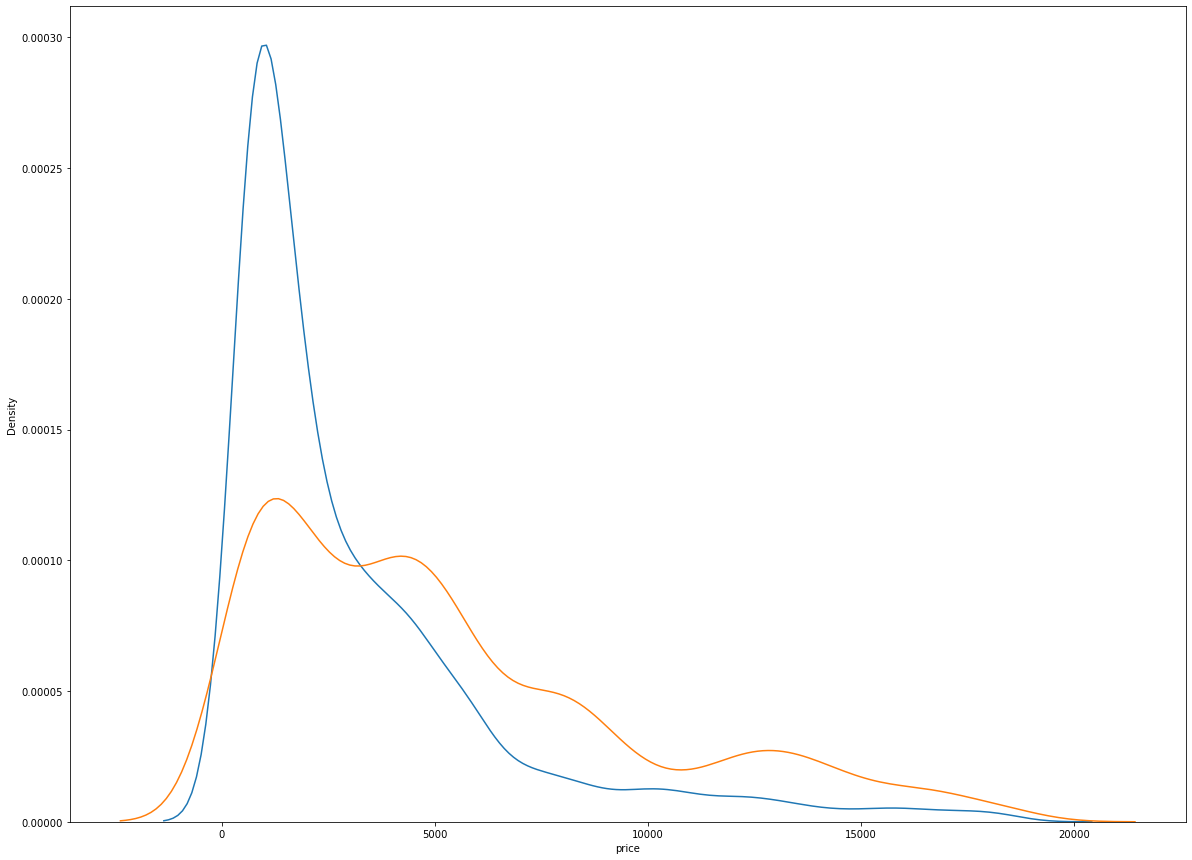

In [16]:
plt.figure(figsize = (20, 15))
sns.distplot(df[df['color'] == 'D']['price'], hist = False)
sns.distplot(df[df['color'] == 'J']['price'], hist = False)

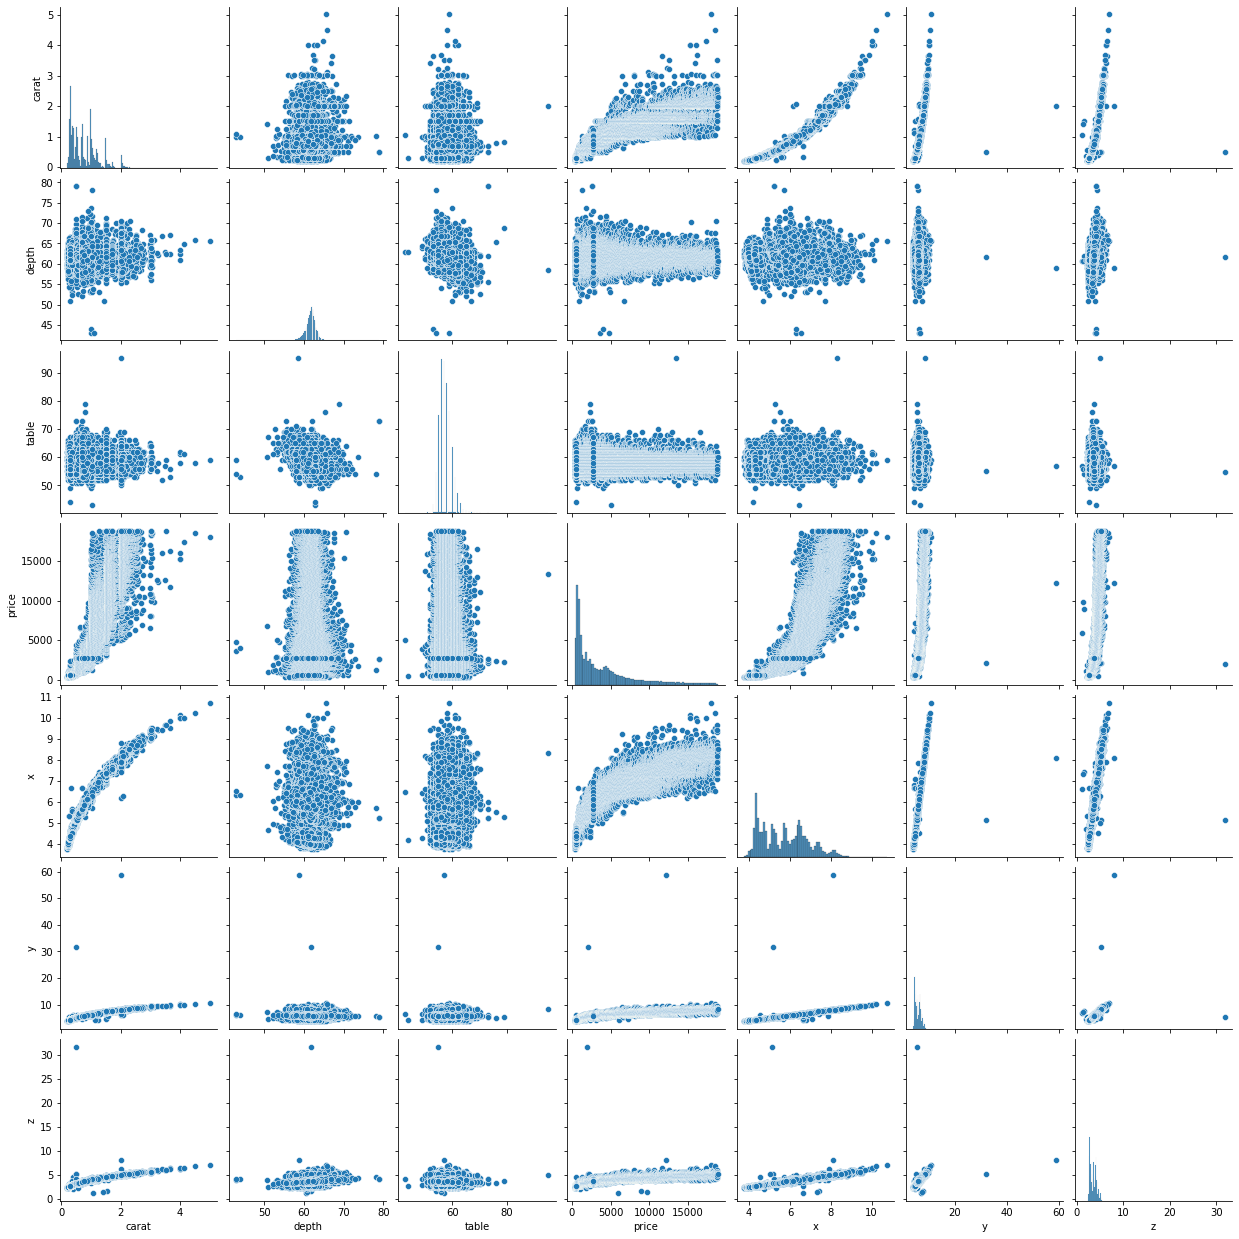

In [17]:
sns.pairplot(df)

**There are some features with datapoint that are far from the rest of the dataset which will affect the outcome of our regression model.**

**"x", "y" and "z" have some dimensional outlies in our dataset that needs to be eliminated. The "depth" should be capped but we must examine the regression line to be sure.**

**The "table" featured should be capped too.**

**we can aslo check for "carats"**

**Let's have a look at regression plots to get a close look at the outliers.**

<AxesSubplot:xlabel='price', ylabel='x'>

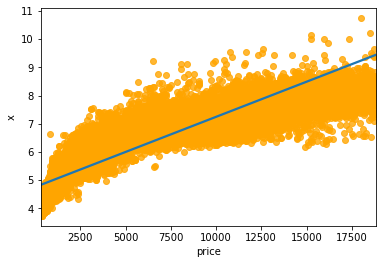

In [22]:
# "Regression Line on Price vs 'x'"
sns.regplot(data = df, x = 'price', y = 'x', fit_reg = True, scatter_kws ={'color' : "orange"})

<AxesSubplot:xlabel='price', ylabel='y'>

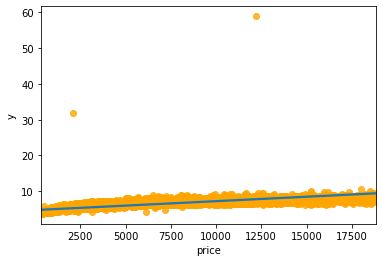

In [21]:
## "Regression Line on Price vs 'y'"
sns.regplot(data = df, x = 'price', y = 'y', fit_reg = True, scatter_kws ={'color' : "orange"})

<AxesSubplot:xlabel='price', ylabel='z'>

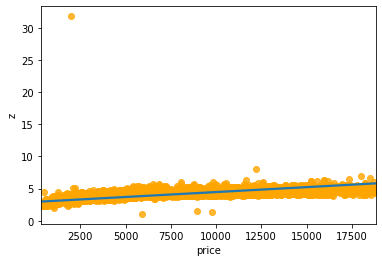

In [23]:
# "Regression Line on Price vs 'z'"
sns.regplot(data = df, x = 'price', y = 'z', fit_reg = True, scatter_kws ={'color' : "orange"})

<AxesSubplot:xlabel='price', ylabel='depth'>

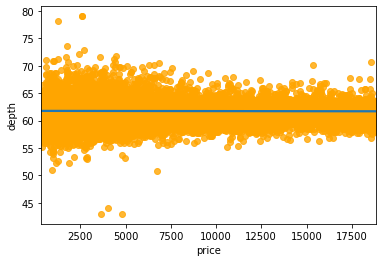

In [24]:
# "Regression Line on Price vs 'depth'"
sns.regplot(data = df, x = 'price', y = 'depth', fit_reg = True, scatter_kws ={'color' : "orange"})

<AxesSubplot:xlabel='price', ylabel='table'>

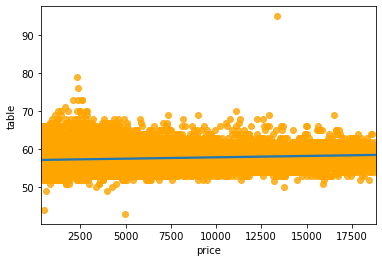

In [25]:
# "Regression Line on Price vs 'table'"
sns.regplot(data = df, x = 'price', y = 'table', fit_reg = True, scatter_kws ={'color' : "orange"})

<AxesSubplot:xlabel='price', ylabel='carat'>

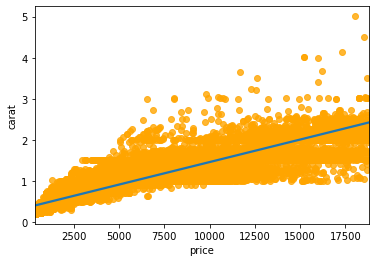

In [26]:
# "Regression Line on Price vs 'carat'"
sns.regplot(data = df, x = 'price', y = 'carat', fit_reg = True, scatter_kws ={'color' : "orange"})

In [27]:
#Dropping the outliers. 
df = df[(df["depth"]<75)&(df["depth"]>45)]
df = df[(df["table"]<80)&(df["table"]>50)]
df = df[(df["x"]<30)]
df = df[(df["y"]<30)]
df = df[(df["z"]<30)&(df["z"]>2)]

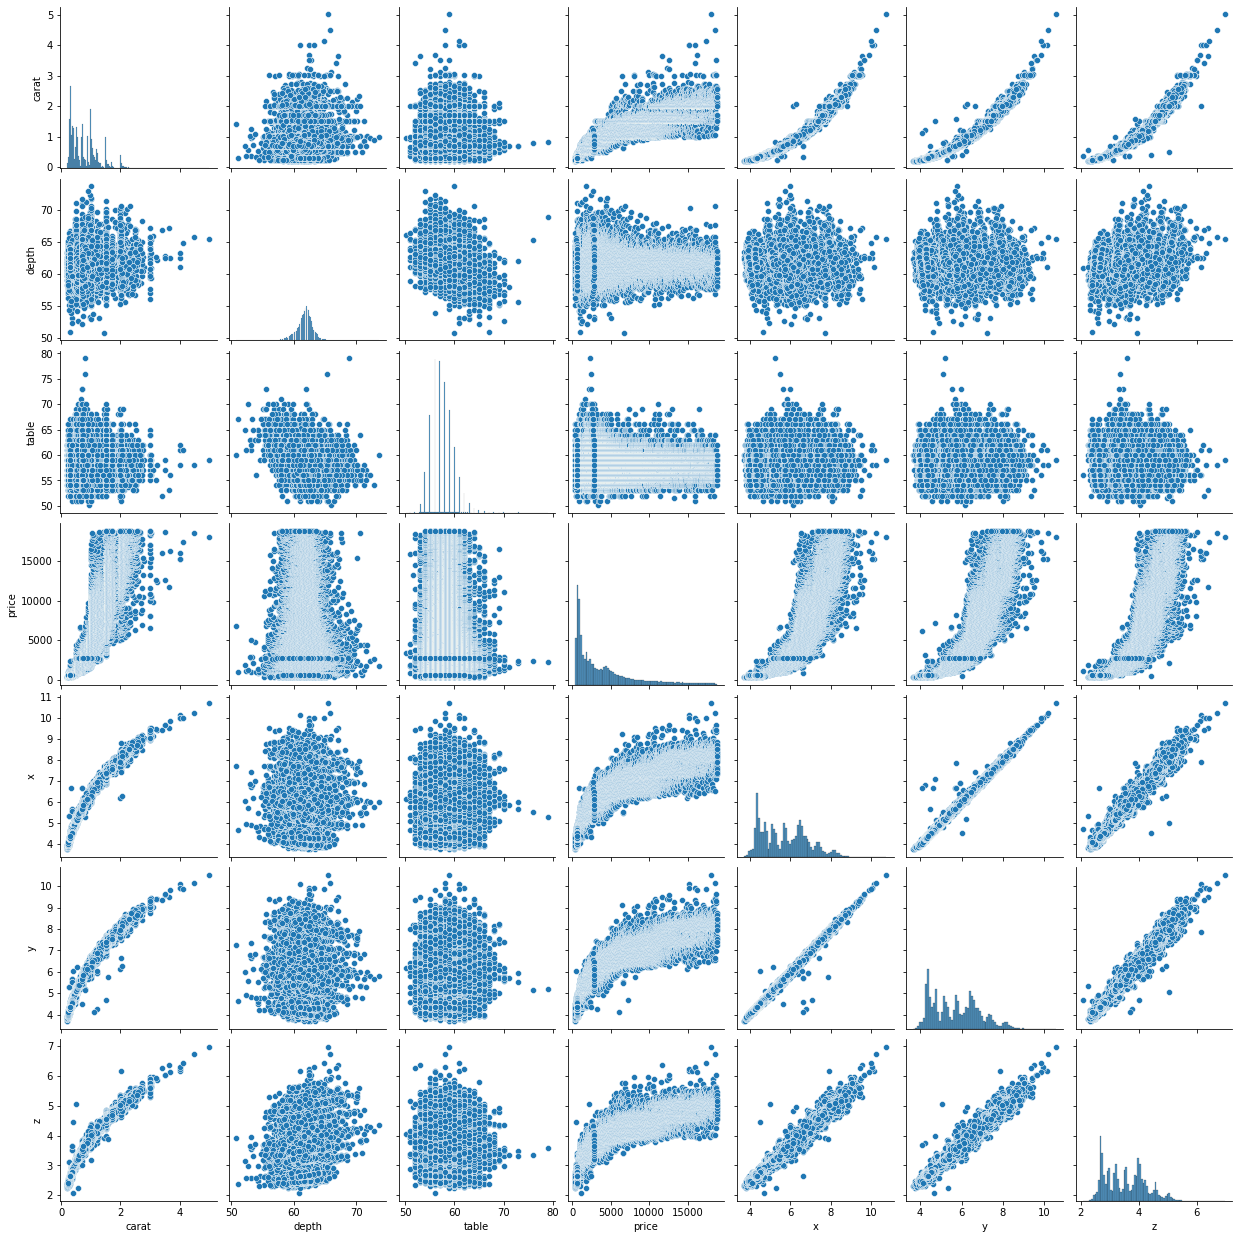

In [28]:
sns.pairplot(df)

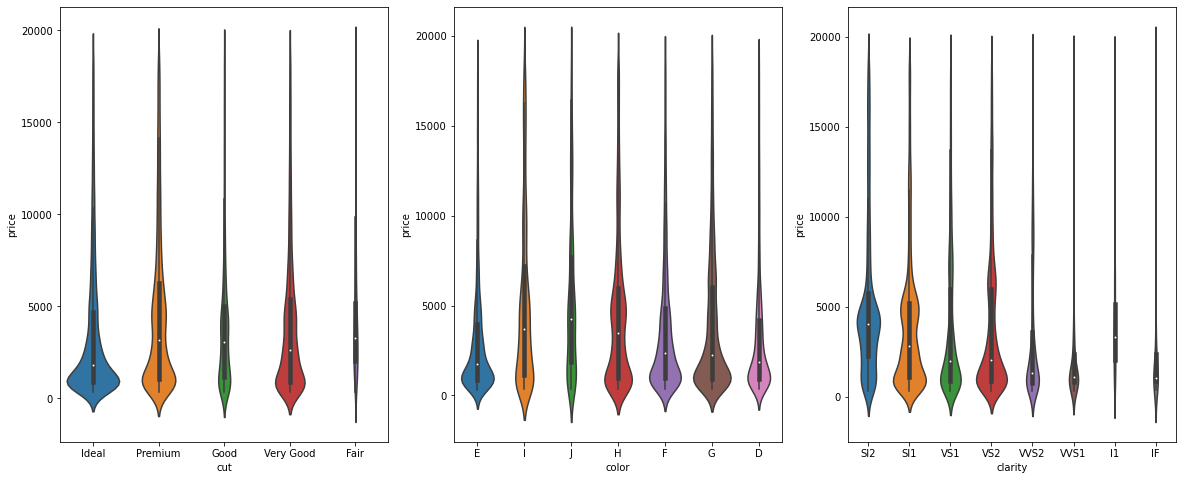

In [29]:
plt.figure(figsize=(20,8))
for i , col in enumerate(categorical):
    plt.subplot(1, 3, i+1)
    sns.violinplot(data = df, x = col, y = 'price', scale = 'count')
    

<AxesSubplot:>

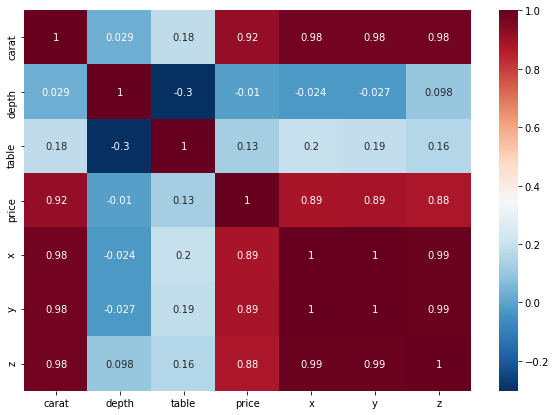

In [30]:
plt.figure(figsize = (10,7))
sns.heatmap(df.corr(), data = df, annot = True, cmap = 'RdBu_r')

In [31]:
X = df.drop('price', axis = 1)
y = df['price']

In [32]:
X, y

(       carat        cut color clarity  depth  table     x     y     z
 0       0.23      Ideal     E     SI2   61.5   55.0  3.95  3.98  2.43
 1       0.21    Premium     E     SI1   59.8   61.0  3.89  3.84  2.31
 2       0.23       Good     E     VS1   56.9   65.0  4.05  4.07  2.31
 3       0.29    Premium     I     VS2   62.4   58.0  4.20  4.23  2.63
 4       0.31       Good     J     SI2   63.3   58.0  4.34  4.35  2.75
 ...      ...        ...   ...     ...    ...    ...   ...   ...   ...
 53935   0.72      Ideal     D     SI1   60.8   57.0  5.75  5.76  3.50
 53936   0.72       Good     D     SI1   63.1   55.0  5.69  5.75  3.61
 53937   0.70  Very Good     D     SI1   62.8   60.0  5.66  5.68  3.56
 53938   0.86    Premium     H     SI2   61.0   58.0  6.15  6.12  3.74
 53939   0.75      Ideal     D     SI2   62.2   55.0  5.83  5.87  3.64
 
 [53901 rows x 9 columns],
 0         326
 1         326
 2         327
 3         334
 4         335
          ... 
 53935    2757
 53936    2757

In [33]:
# split the data into train and test and make the data transformation
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.3, random_state=42)

In [34]:
import sklearn
sklearn.__version__

'1.1.1'

In [35]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((37730, 9), (16171, 9), (37730,), (16171,))

#### we have to perform columns transformation we have to do it on both the train and test set seperately and for the categorical columns we have to perform label encoding instead of one hot encoding as the categorical columns are of ordinal type and for the numerical columns we have to perform the Scalar transformation

In [36]:
# making the caterogical and numerical column seperately
X_train_cat = X_train.select_dtypes(include = ['object'])
X_train_num = X_train.select_dtypes(include = ['int64', 'float64'])
X_train_num.head()

,carat,depth,table,x,y,z
15000,1.30,63.7,57.0,6.94,6.87,4.40
20548,1.13,59.3,59.0,6.87,6.79,4.05
36165,0.38,63.0,54.0,4.61,4.66,2.92
44125,0.50,62.6,58.0,5.07,5.12,3.19
18888,1.61,61.4,62.0,7.54,7.48,4.62


In [37]:
X_train_cat.head()

,cut,color,clarity
15000,Good,H,SI2
20548,Premium,G,VVS1
36165,Ideal,D,VS2
44125,Premium,E,VS2
18888,Premium,H,SI2


In [38]:
# as for categorical columns the data is comparitive so the columns are ordinal,  so we can use label encoding
X_train_cat_le = pd.DataFrame(index=X_train_cat.index)

X_train_cat_le.head()

""
15000
20548
36165
44125
18888


In [39]:
X_train_cat.cut.unique()

array(['Good', 'Premium', 'Ideal', 'Very Good', 'Fair'], dtype=object)

In [40]:
cut_le = {'Fair' : 1, 'Good' : 2, 'Very Good' : 3, 'Ideal' : 4, 'Premium' : 5}

X_train_cat_le['cut'] = X_train_cat['cut'].apply(lambda x : cut_le[x])

X_train_cat_le.head()

,cut
15000,2
20548,5
36165,4
44125,5
18888,5


In [41]:
X_train_cat.color.unique()

array(['H', 'G', 'D', 'E', 'F', 'I', 'J'], dtype=object)

In [42]:
color_le = {'J':1, 'I':2, 'H':3, 'G':4, 'F':5, 'E':6, 'D':7}

X_train_cat_le['color'] = X_train_cat['color'].apply(lambda x : color_le[x])

X_train_cat_le.head()

,cut,color
15000,2,3
20548,5,4
36165,4,7
44125,5,6
18888,5,3


In [43]:
X_train_cat.clarity.unique()

array(['SI2', 'VVS1', 'VS2', 'SI1', 'VVS2', 'VS1', 'IF', 'I1'],
      dtype=object)

In [44]:
clarity_le = {'I1':1, 'SI2':2, 'SI1':3, 'VS2':4, 'VS1':5, 'VVS2':6, 'VVS1':7, 'IF':8}

X_train_cat_le['clarity'] = X_train_cat['clarity'].apply(lambda x : clarity_le[x])

X_train_cat_le.head()

,cut,color,clarity
15000,2,3,2
20548,5,4,7
36165,4,7,4
44125,5,6,4
18888,5,3,2


In [45]:
X_train_cat_le.shape

(37730, 3)

In [46]:
import sklearn
sklearn.__version__

'1.1.1'

In [47]:
sklearn.__version__

'1.1.1'

In [48]:
# numerical column trasformation
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_num_rescaled = pd.DataFrame(scaler.fit_transform(X_train_num), 
                                    columns = X_train_num.columns,
                                    index = X_train_num.index)
X_train_num_rescaled.head()

,carat,depth,table,x,y,z
15000,1.050446,1.382788,-0.205956,1.073038,1.016383,1.237493
20548,0.693610,-1.731073,0.693802,1.010697,0.944613,0.732913
36165,-0.880665,0.887401,-1.555592,-1.001998,-0.966265,-0.896157
44125,-0.628781,0.604323,0.243923,-0.592335,-0.553587,-0.506910
18888,1.701146,-0.244912,2.043438,1.607382,1.563629,1.554657


In [49]:
X_train_num_rescaled.shape

(37730, 6)

In [50]:
# concatinate the dataframes
X_train_transformed = pd.concat([X_train_num_rescaled, X_train_cat_le], axis=1)
# X_train_transformed = X_train_transformed.reset_index(drop = True)
X_train_transformed.head()

,carat,depth,table,x,y,z,cut,color,clarity
15000,1.050446,1.382788,-0.205956,1.073038,1.016383,1.237493,2,3,2
20548,0.693610,-1.731073,0.693802,1.010697,0.944613,0.732913,5,4,7
36165,-0.880665,0.887401,-1.555592,-1.001998,-0.966265,-0.896157,4,7,4
44125,-0.628781,0.604323,0.243923,-0.592335,-0.553587,-0.506910,5,6,4
18888,1.701146,-0.244912,2.043438,1.607382,1.563629,1.554657,5,3,2


In [51]:
X_train_transformed.shape

(37730, 9)

In [52]:
# preparing the test data in same way:
X_test_cat = X_test.select_dtypes(include=['object'])

X_test_num = X_test.select_dtypes(include=['int64', 'float64'])

In [53]:
# num columns
X_test_num_rescaled = pd.DataFrame(scaler.transform(X_test_num), 
                                   columns = X_test_num.columns,
                                      index = X_test_num.index)

X_test_num_rescaled.head()

,carat,depth,table,x,y,z
32215,-1.027597,0.179706,-1.555592,-1.206830,-1.208489,-1.184488
40369,-0.712742,-0.457221,-1.105713,-0.681392,-0.652271,-0.708742
39666,-0.796704,0.321245,-1.555592,-0.814978,-0.840668,-0.795241
23219,1.911049,0.604323,-0.205956,1.714250,1.671284,1.785322
13614,0.420736,0.462784,0.693802,0.556505,0.612676,0.646414


In [54]:
X_test_cat_le = pd.DataFrame(index = X_test_cat.index)

X_test_cat_le.head()

""
32215
40369
39666
23219
13614


In [55]:
# categorical
X_test_cat_le['cut'] = X_test_cat['cut'].apply(lambda x : cut_le[x])
X_test_cat_le['color'] = X_test_cat['color'].apply(lambda x : color_le[x])
X_test_cat_le['clarity'] = X_test_cat['clarity'].apply(lambda x : clarity_le[x])
X_test_cat_le.head()

,cut,color,clarity
32215,4,4,7
40369,4,3,3
39666,4,4,4
23219,5,4,2
13614,3,6,3


In [56]:
# concatenate
X_test_transformed = pd.concat([X_test_num_rescaled, X_test_cat_le], axis=1)
# X_test_transformed = X_test_transformed.reset_index(drop = True)
X_test_transformed.head()

,carat,depth,table,x,y,z,cut,color,clarity
32215,-1.027597,0.179706,-1.555592,-1.206830,-1.208489,-1.184488,4,4,7
40369,-0.712742,-0.457221,-1.105713,-0.681392,-0.652271,-0.708742,4,3,3
39666,-0.796704,0.321245,-1.555592,-0.814978,-0.840668,-0.795241,4,4,4
23219,1.911049,0.604323,-0.205956,1.714250,1.671284,1.785322,5,4,2
13614,0.420736,0.462784,0.693802,0.556505,0.612676,0.646414,3,6,3


**we can use different models and we can compare the results of the models based on it**

we can use linear regressor, knn regressor, random forest regressor

In [57]:
# import the models
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor

In [58]:
# instanciating the model
linear_model = LinearRegression()
knn_model = KNeighborsRegressor()
rfr_model = RandomForestRegressor()
dt_model = DecisionTreeRegressor()

In [59]:
# fitting the linear regressor
linear_model.fit(X_train_transformed, y_train)

LinearRegression()

In [60]:
pred = linear_model.predict(X_test_transformed)

In [61]:
pred[:5]

array([ 1378.35710258,   195.29985197,   627.04528024, 10861.56513071,
        5425.92688999])

In [62]:
mse_lr = mean_squared_error(y_test, pred)

In [63]:
df_comp_lr = pd.DataFrame(list(zip(y_test, pred )), columns = ['y_test', 'pred'])

In [64]:
df_comp_lr

,y_test,pred
0,789,1378.357103
1,1130,195.299852
2,1087,627.045280
3,11227,10861.565131
4,5571,5425.926890
...,...,...
16166,5570,6006.319061
16167,694,1007.379451
16168,2496,3662.503947
16169,1193,437.734663


In [65]:
# Knn
knn_model.fit(X_train_transformed, y_train)

KNeighborsRegressor()

In [66]:
pred_knn = knn_model.predict(X_test_transformed)

In [67]:
mse_knn = mean_squared_error(y_test, pred_knn)

In [68]:
df_comp_knn = pd.DataFrame(list(zip(y_test, pred_knn )), columns = ['y_test', 'pred_knn'])

In [69]:
df_comp_knn

,y_test,pred_knn
0,789,794.0
1,1130,848.8
2,1087,934.8
3,11227,10057.2
4,5571,5101.0
...,...,...
16166,5570,5166.0
16167,694,844.4
16168,2496,2454.2
16169,1193,1024.0


In [70]:
rfr_model.fit(X_train_transformed, y_train)

RandomForestRegressor()

In [71]:
pred_rfr = rfr_model.predict(X_test_transformed)

In [72]:
mse_rfr = mean_squared_error(y_test, pred_rfr)

In [73]:
df_comp_rfr = pd.DataFrame(list(zip(y_test, pred_rfr )), columns = ['y_test', 'pred_rfr'])

In [74]:
df_comp_rfr

,y_test,pred_rfr
0,789,846.630
1,1130,914.280
2,1087,1060.340
3,11227,10406.310
4,5571,5040.230
...,...,...
16166,5570,5494.420
16167,694,685.670
16168,2496,2488.036
16169,1193,1242.150


In [75]:
dt_model.fit(X_train_transformed, y_train)

DecisionTreeRegressor()

In [76]:
pred_dt = dt_model.predict(X_test_transformed)

In [77]:
mse_dt = mean_squared_error(y_test, pred_dt)

In [78]:
df_comp_dt = pd.DataFrame(list(zip(y_test, pred_dt )), columns = ['y_test', 'pred_dt'])

In [79]:
df_comp_dt

,y_test,pred_dt
0,789,789.0
1,1130,790.0
2,1087,1087.0
3,11227,9275.0
4,5571,4864.0
...,...,...
16166,5570,5527.0
16167,694,670.0
16168,2496,2435.0
16169,1193,1240.0


In [80]:
mse_dt

537662.5816860086

In [81]:
mse = [mse_lr, mse_knn, mse_rfr, mse_dt]
x = [5, 10, 15, 20]  # make and x axis for the plotting

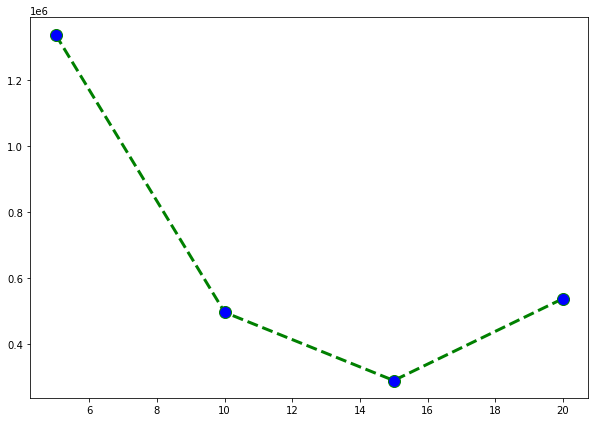

In [82]:
plt.figure(figsize = (10, 7))
plt.plot(x, mse, color='green', linestyle='dashed', linewidth = 3,
         marker='o', markerfacecolor='blue', markersize=12)

## As we can clearly see the model with least mse is random forest regressor so we can use that for the prediction purposes